In [78]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
# Look at hypervolume path with and without dose mutation
# Data stored in excel 
# Population: init_pop_inhib_100
no_dose_mutation = [43.0610065796112,45.3784876700224,45.4883048681513,45.8924170210912,46.4910858733101,46.6289648746817,47.1591983437234,47.3402635124311,47.3793608542777,47.3793608542777,47.5953891356451,47.6135967943118,47.7171262581934,47.7171557958043,47.7326095721746,47.7881547763278,47.8707197192692,47.914508379776,47.9201694766019,47.9201804626858,47.9806469923547,47.9844213691323,47.98623560632,47.9869308017546,48.1221718762088,48.1295633424017,48.1491215698829,48.1649529884427,48.1657779688459,48.1681255744522,48.1732520872458,48.1788699861919,48.1815977613685,48.203758735407,48.2267989659263,48.2298524884151,48.2427264042878,48.2456680558312,48.2482927999108,48.2535765457684,48.2564963558506,48.2894336822289,48.2990503252468,48.3086867962006,48.3091332348932,48.3157010562081,48.3178212498133,48.3183066935563,48.3158941547813,48.3235076899907,48.3226502576436,48.3226502576437,48.3262306396843,48.337118115124,48.3358867831733,48.3430780702596,48.3436688344038,48.3411510152587,48.3419839887574,48.3464231965727,48.3480981076764,48.3472495680849,48.3438151262226,48.344916097531,48.3444161787404,48.3420451630267,48.3437197186272,48.3434686652923,48.3460938036231,48.3464372369857,48.3474665134072,48.3474665134072,48.3484003397517,48.3489741172086,48.3489741172086,48.3478842257292,48.3471856979601,48.3454741886236,48.3599927812909,48.3599927812909,48.3612652882839,48.3618025875846,48.3631415628786,48.3787292141689,48.3787292141689,48.3782515860372,48.3782515860372,48.3788795513901,48.3852053344483,48.3850551392668,48.3830360183269,48.3809152046911,48.3760358293381,48.3759997478353,48.3997016713423,48.400103530068,48.3919077096171,48.3942343537741,48.4103208526648,48.4094286987606,48.4083220700012,48.4135109623565,48.4131991379099,48.4110723321057,48.4080587351957,48.410832545917,48.4086345323974,48.4063122962414,48.4063122962414,48.4093684372823,48.4088996648361,48.4089276033874,48.4066593806956,48.4100774039373,48.416219272633,48.417609905295,48.4197660039548,48.4154174236965,48.4127780446081,48.4115799478405,48.4093912459494,48.4104985515385,48.4131114984765,48.4141162206092,48.417889338098,48.4187460451789,48.4187460451789,48.4190608754963,48.4245386062753,48.4225403147477,48.4265331271922,48.4294527049428,48.4280906109851,48.4323071689125,48.4303846781437,48.4301079034309,48.4313572148615,48.4301566809722,48.4283634737366,48.4270260413593,48.4289414936285,48.4265322394229,48.4229126634747,48.4186835886863,48.4222744386112,48.4195614271626,48.4182111593039,48.4203121416467,48.4145960013249,48.4249850736661,48.4269760249664,48.4272643551971,48.427016938814,48.4253065852638,48.4250668674789,48.431641136108,48.4356169993045,48.4309853071994,48.4317948217694,48.4316377486464,48.429645816077,48.4312896291791,48.4247840400389,48.4255626003954,48.4177892580213,48.4112188256009,48.4100680977085,48.4156880421979,48.4090510904464,48.4360818168697,48.4405819132404,48.4332235739221,48.4318528593351,48.4235365838008,48.4335703887982,48.4368876562345,48.4308545650668,48.4288452926347,48.425974456026,48.4267917001557,48.4269979420205,48.433424474033,48.4375330084128,48.4404695289378,48.4426166112694,48.4425502040734,48.4460303041353,48.4455486099697,48.4407140207621,48.4447047893318,48.4466115032505,48.4515748215028,48.4516324873109,48.4379861776767,48.4347682716595,48.4412609538567,48.4425039311885,48.4405036441488,48.4377254993805,48.432380656787]
dose_mutation = [45.621070379115736, 46.05454258167059, 46.21969183460186, 46.95815988301557, 47.2205972289203, 47.233315665348, 47.39041679516748, 47.39041679516748, 47.449188659396995,47.4587438604664, 47.45874386046644, 47.46621642146886, 47.56129755822613, 47.57346634792059, 47.57346634792059, 47.60055009362998, 47.61260214654957, 47.61949336059523, 47.635093755207215, 47.64119730828887, 47.64119730828887, 47.65341526874789, 47.69667717052986, 47.72203879676424, 47.7542077549174, 47.76625785222335, 47.89480154233182, 47.923756345517575, 47.94918477881499, 48.10073777069271, 48.10735847521045, 48.24636088959535, 48.27286420562581, 48.30841413572758, 48.30903966488835, 48.31669651588778, 48.325543327621915, 48.3417802821546, 48.33910131009755, 48.34268506645833, 48.35054681254368, 48.35384542648399, 48.36467649431171, 48.375204374639054, 48.37512918001518, 48.37532449406595, 48.374774386830566, 48.37423571849399, 48.37269196653279, 48.367884953151886, 48.36333892001243, 48.4061029674487, 48.40613643841472, 48.40981944011482, 48.41018813965216, 48.41640374457958, 48.42821620232964, 48.42531827801869, 48.42891686634399, 48.42528823182718, 48.43207243054403, 48.43683352216155, 48.43475497536026, 48.437068148163306, 48.44030924710144, 48.44889016369998, 48.4344037341521, 48.432356300162894, 48.44682978103506, 48.44555551864916, 48.44646914528097, 48.44702574523844, 48.44842182268506, 48.453404145208204, 48.45157225432013, 48.45501664432816, 48.46586192958066, 48.46899500760961, 48.46814925636143, 48.4691601687311, 48.46968337777751, 48.46716013638817, 48.460993543481266, 48.46121502199351, 48.46542946304952, 48.46810129628686, 48.467696294807276, 48.47721418776186, 48.475228807961145, 48.477833991158995, 48.479200377650905, 48.485843401406186, 48.48657670180867, 48.489222856888354, 48.484261251046455, 48.48436572665425, 48.48595773914374, 48.48877431984597, 48.48510905720954, 48.478534179585495, 48.48233056916659, 48.491105803462716, 48.49404215970532, 48.488226657973186, 48.488228100159525, 48.48019753729339, 48.47573347099605, 48.48415172272939, 48.48525712162618, 48.48460800442477, 48.480974332495094, 48.48190189387163, 48.48045462896776, 48.47884425374504, 48.477633992716136, 48.480234828511996, 48.4775929797606, 48.49543466665506, 48.50234815500703, 48.500107086822744, 48.499090630102, 48.50109967101618, 48.502975868132864, 48.49774550583881, 48.491962334988415, 48.50056677447462, 48.50096350531733, 48.510223518391854, 48.51824459878923, 48.51822313827157, 48.51621610484456, 48.512877870659594, 48.50689213912984, 48.51324570517779, 48.50282733738263, 48.509106537369455, 48.51228788531869, 48.513513632156105, 48.50948942353489, 48.51814978502195, 48.51241428873273, 48.516715772555564, 48.51437542685251, 48.519151669190265, 48.51258688333559, 48.52015407778723, 48.511237459510546, 48.50873774362135, 48.51326419389665, 48.512433521207825, 48.51179886004998, 48.50524305533705, 48.51368971042698, 48.51166865129331, 48.51084269728929, 48.507787187145325, 48.51155328578568, 48.513859861268145, 48.50907648165908, 48.51410619322101, 48.51649461749449, 48.5144173651917, 48.51286026457461, 48.51954662522114, 48.517204271457075, 48.51787640007695, 48.518207286279186, 48.51247613375771, 48.54146395586568, 48.54140202006493, 48.532798447922296, 48.54082350398291, 48.53896515235088, 48.53127773289329, 48.52204021814133, 48.52544587094904, 48.5290462964623, 48.53039295806387, 48.5316255843703, 48.52663326743783, 48.534257584773854, 48.521431573983065, 48.53328178434185, 48.53409532524239, 48.532786823732295, 48.528973087929515, 48.53469138518443, 48.53356572222163, 48.52887405829322, 48.526561093916065, 48.531537266968726, 48.5381811275535, 48.54110931887036, 48.54277414160512, 48.54316875524372, 48.540228197997266, 48.53924442563761, 48.54467875948863, 48.543129131988024, 48.54210494475387]

dose_mutation = pd.DataFrame({"Yes":dose_mutation,"No":no_dose_mutation})

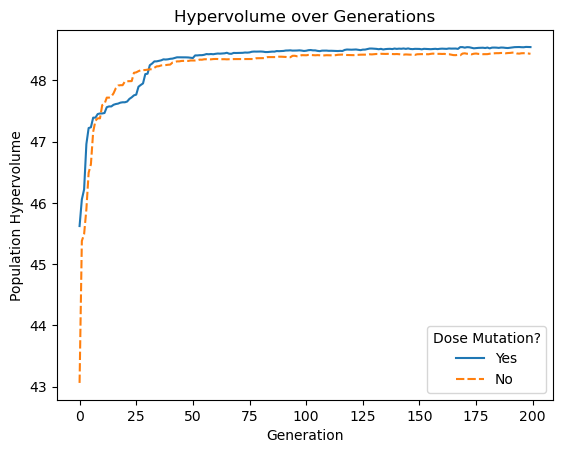

In [87]:
# Full plot
sns.lineplot(data = dose_mutation)
plt.title("Hypervolume over Generations")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Dose Mutation?")

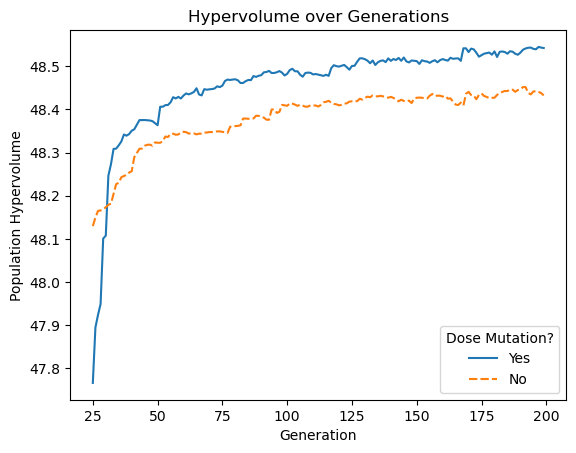

In [88]:
# Zoom in to end of the plot above
sns.lineplot(data = dose_mutation.loc[25:,:])
plt.title("Hypervolume over Generations")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Dose Mutation?")

In [92]:
# Compare hypervolume using every combination of two mutations
# Equal probability of all included mutations in each run
# Population: init_pop_inhib_100
with open("Equal.pkl", "rb") as fid:
    Equal = pickle.load(fid)
    
with open("DoseEdgeEqual.pkl", "rb") as fid:
    DoseEdge = pickle.load(fid)
    
with open("DoseTypeEqual.pkl", "rb") as fid:
    DoseType = pickle.load(fid)

with open("DoseNumEqual.pkl", "rb") as fid:
    DoseNum = pickle.load(fid)
    
with open("EdgeNumEqual.pkl", "rb") as fid:
    EdgeNum = pickle.load(fid)
    
with open("EdgeTypeEqual.pkl", "rb") as fid:
    EdgeType = pickle.load(fid)
    
with open("NumTypeEqual.pkl", "rb") as fid:
    NumType = pickle.load(fid)

In [93]:
df = pd.DataFrame({"All":Equal, "DoseEdge":DoseEdge, "DoseType":DoseType, "DoseNum":DoseNum,
                  "EdgeNum":EdgeNum, "EdgeType":EdgeType, "NumType":NumType})
#df["Generation"] = np.arange(0,100)

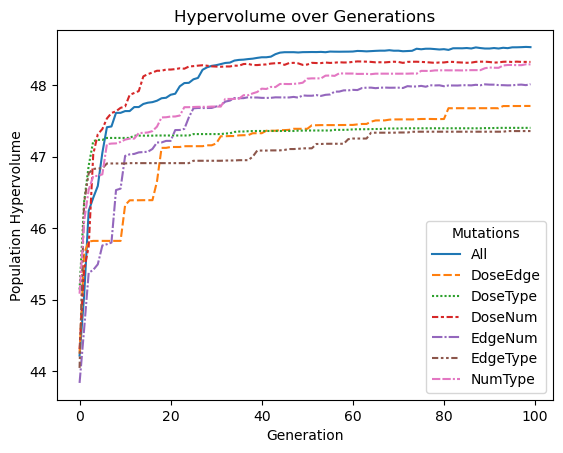

In [94]:
sns.lineplot(data = df)
plt.title("Hypervolume over Generations with Selected Mutations")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")

In [95]:
# Compare hypervolume using every combination of 3 mutations
# Equal probability of all included mutations in each run
# Population: init_pop_inhib_100
with open("TypeEdgeDoseEqual.pkl", "rb") as fid:
    TypeEdgeDose = pickle.load(fid)
    
with open("NumEdgeDoseEqual.pkl", "rb") as fid:
    NumEdgeDose = pickle.load(fid)
    
with open("NumTypeDoseEqual.pkl", "rb") as fid:
    NumTypeDose = pickle.load(fid)

with open("NumTypeEdgeEqual.pkl", "rb") as fid:
    NumTypeEdge = pickle.load(fid)

In [96]:
triple = pd.DataFrame({"NoNum":TypeEdgeDose, "NoType":NumEdgeDose, "NoEdge":NumTypeDose, "NoDose":NumTypeEdge,
                  "All":Equal})
#df["Generation"] = np.arange(0,100)

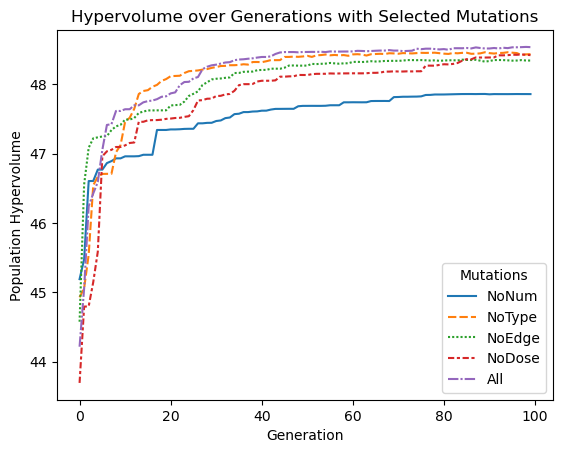

In [98]:
sns.lineplot(data = triple)
plt.title("Hypervolume over Generations with Selected Mutations")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")

In [112]:
# Exploring effect of adding weight to the node number mutation over 1000 generations 
# Population: init_pop_inhib_100

# Equal probability of all mutations
with open("EqualLong.pkl", "rb") as fid:
    EqualLong = pickle.load(fid)

# Node number mutation probability of 0.4, all others have a probability of 0.2
with open("UnequalLong.pkl", "rb") as fid:
    UnequalLong = pickle.load(fid)
    
# Node number mutation probability of 0.52, all others have a probability of 0.16
with open("MoreUnequalLong.pkl", "rb") as fid:
    MoreUnequalLong = pickle.load(fid)

In [102]:
long = pd.DataFrame({"Equal":EqualLong, "NodeNum = 0.4": UnequalLong, "NodeNum = 0.52" : MoreUnequalLong})
#df["Generation"] = np.arange(0,100)

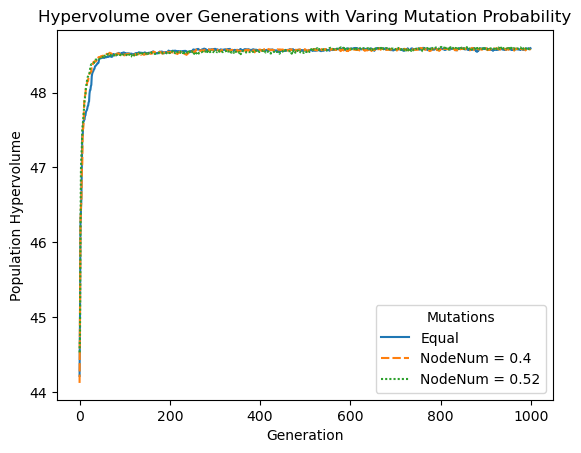

In [106]:
# Full Plot
sns.lineplot(data = long)
plt.title("Hypervolume over Generations with Varing Mutation Probability")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")

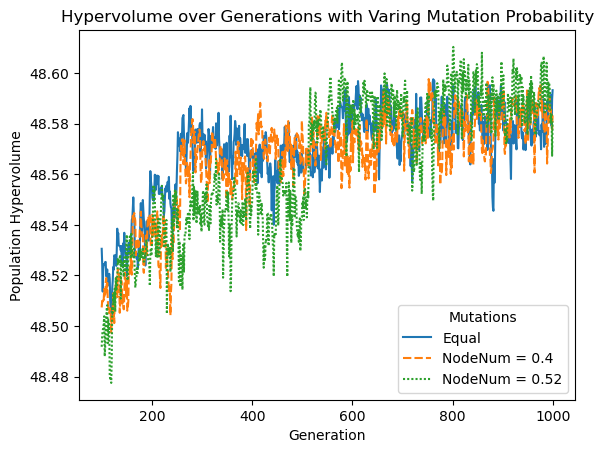

In [108]:
# Zoomed in Plot
sns.lineplot(data = long.loc[100:,:])
plt.title("Hypervolume over Generations with Varing Mutation Probability")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")

In [109]:
# Exploring effect of adding weight to the node number mutation with a larger population
# Population: init_pop_inhib_500

# Equal probability of all mutations
with open("EqualLarger.pkl", "rb") as fid:
    EqualLarger = pickle.load(fid)

# Node number mutation probability of 0.4, all others have a probability of 0.2
with open("UnequalLarger.pkl", "rb") as fid:
    UnequalLarger = pickle.load(fid)
    
# Node number mutation probability of 0.52, all others have a probability of 0.16
with open("MoreUnequalLarger.pkl", "rb") as fid:
    MoreUnequalLarger = pickle.load(fid)

In [110]:
larger = pd.DataFrame({"Equal":EqualLarger, "Unequal": UnequalLarger, "More Unequal" : MoreUnequalLarger})

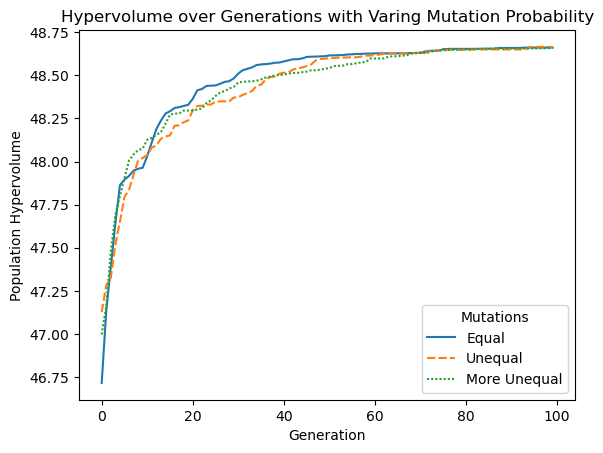

In [111]:
# Full Plot
sns.lineplot(data = larger)
plt.title("Hypervolume over Generations with Varing Mutation Probability")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")

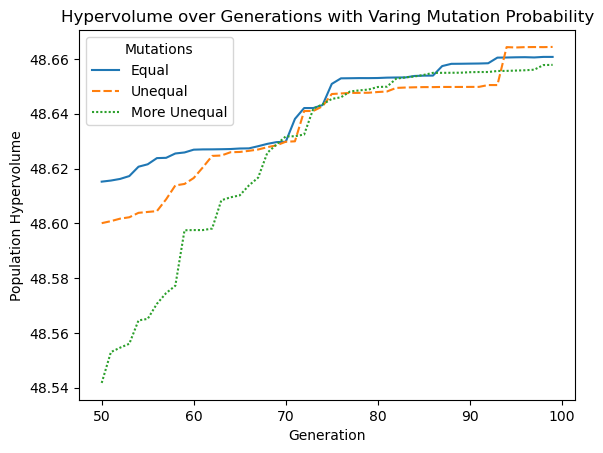

In [113]:
# Zoomed in Plot
sns.lineplot(data = larger.loc[50:,:])
plt.title("Hypervolume over Generations with Varing Mutation Probability")
plt.xlabel("Generation")
plt.ylabel("Population Hypervolume")
plt.legend(title = "Mutations")